# Технологии машинного обучения
# Рубежный контроль №2
# Тема: технологии использования и оценки моделей машинного обучения

## ИУ5-63 Сёмкин Никита Евгеньевич
## 16 вариант

Задача 2. Кластеризация данных.

Кластеризуйте данные с помощью двух алгоритмов кластеризации (варианты по группам приведены в таблице).
Сравните качество кластеризации с помощью следующих метрик качества кластеризации (если это возможно для Вашего набора данных):
Adjusted Rand index
Adjusted Mutual Information
Homogeneity, completeness, V-measure
Коэффициент силуэта

Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.

### Импорт библиотек

In [41]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [40]:
data = pd.read_csv('restaurant-scores-lives-standard.csv')

In [77]:
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [79]:
data.shape

(53973, 17)

In [80]:
data.isnull().sum()

business_id                  0
business_name                0
business_address             0
business_city                0
business_state               0
business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_location        24095
business_phone_number    36539
inspection_id                0
inspection_date              0
inspection_score         14114
inspection_type              0
violation_id             13462
violation_description    13462
risk_category            13462
dtype: int64

In [81]:
X=data[['business_postal_code']+['business_latitude']+['business_longitude']+['business_phone_number']+['inspection_score']+['violation_id']]

In [82]:

X.isnull().sum()

business_postal_code      1083
business_latitude        24095
business_longitude       24095
business_phone_number    36539
inspection_score         14114
violation_id             13462
dtype: int64

In [83]:
X = X.dropna(axis=0, how='any')
X.head()

,business_postal_code,business_latitude,business_longitude,business_phone_number,inspection_score,violation_id
33,94134,37.729016,-122.419253,1.415546e+10,88.0,5827_20190903_103120
204,94103,37.765142,-122.419026,1.415563e+10,87.0,2409_20190724_103103
355,94133,37.796152,-122.405255,1.415599e+10,94.0,59002_20190709_103161
363,94103,37.776384,-122.411684,1.415562e+10,75.0,10332_20181127_103153
427,94110,37.760295,-122.418953,1.415578e+10,82.0,5257_20190911_103129


In [84]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [85]:
le=LabelEncoder()
X['business_postal_code'] = le.fit_transform(X['business_postal_code'])
X['business_latitude'] = le.fit_transform(X['business_latitude'])
X['business_longitude'] = le.fit_transform(X['business_longitude'])
X['inspection_score'] = le.fit_transform(X['inspection_score'])

## Метод k-средних

In [74]:
from sklearn.cluster import KMeans, MiniBatchKMeans

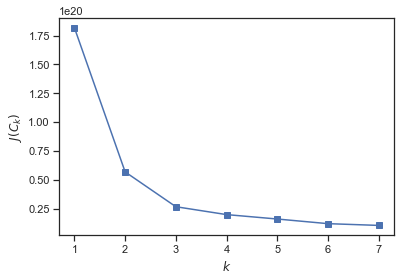

In [86]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

##### В качетве метрики будем использовать коэффициент силуэта, с помощью него и подберем оптимальное число кластеров.

In [87]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit_predict(X) 
    inertia.append((silhouette_score(X, kmeans),k))
inertia

[(0.8630730347039044, 2),
 (0.8602010581275319, 3),
 (0.8251513444824349, 4),
 (0.6834006171871742, 5),
 (0.6565003671993367, 6),
 (0.6542356733005134, 7),
 (0.6316182901834418, 8),
 (0.6451317807000854, 9),
 (0.6264305450577118, 10),
 (0.6287158723323713, 11),
 (0.6239887911131765, 12),
 (0.619642593233537, 13),
 (0.6171279145023945, 14)]

##### Выбеерем число кластеров = 2

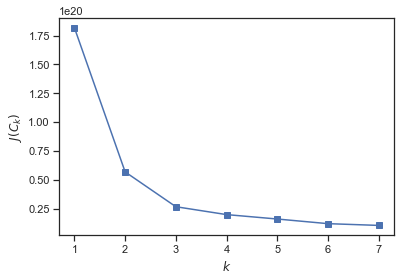

In [75]:

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [76]:

inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit_predict(X) 
    inertia.append((silhouette_score(X, kmeans),k))
inertia

[(0.8630730347039044, 2),
 (0.8602010581275319, 3),
 (0.8251513444824349, 4),
 (0.6834006171871742, 5),
 (0.6565003671993367, 6),
 (0.6542356733005134, 7),
 (0.6316182901834418, 8),
 (0.6451317807000854, 9),
 (0.6264305450577118, 10),
 (0.6287158723323713, 11),
 (0.6239887911131765, 12),
 (0.619642593233537, 13),
 (0.6171279145023945, 14)]

Выбеерем число кластеров = 2

In [88]:
%time result_KMeans_2 =  KMeans(n_clusters=2, init='k-means++').fit_predict(X)

Wall time: 53.8 ms


In [89]:
silhouette_score(X, result_KMeans_2)

0.8630730347039044

## Алгоритм BIRCH

In [90]:
from sklearn.cluster import Birch

In [91]:
result_Birch = Birch().fit_predict(X)
silhouette_score(X, result_Birch)

0.8548017714025643

In [92]:
%time result_Birch = Birch(n_clusters=2).fit_predict(X)

Wall time: 1.03 s


In [93]:
silhouette_score(X, result_Birch)

0.8578122102184962

Значение метрики чуть больше у метода k-средних.